<a href="https://colab.research.google.com/github/git-hys/Python25Study/blob/main/07_03_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC(%EB%93%9C%EB%A1%AD%EC%95%84%EC%9B%83%2C%EC%BD%9C%EB%B0%B1%2C%EC%A1%B0%EA%B8%B0%EC%A2%85%EB%A3%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 인공 신경망을 구성하는 절차

# 1. 더미데이터 준비
# 2. 훈련용, 검증용, 테스트용으로 나눔
# 3. 심층을 만듬(dense)
# 4. model에 적용
# 5. 컴파일 진행(최적화 기법 적용 : adam)
# 6. fit 훈련
# 7. evaluate(검증)

In [ ]:
# 손실곡선 : fit() 메서드로 모델을 훈련하는 동안 훈련과정이 상세하게 출력되어 확인 할 수 있다
# (에포크 횟수, 손실, 정확도)
# 아래쪽에 출력 메세지가 나옴
# 코랩 노트북에 코드셀은print() 명령어를 사용하지 않아도 마지막 라인에 실행결과를 자동으로 출력

# 다시말해 fit()메서드는 history라는 클래스 객체를 반환(훈련과정의 지표, 손실, 정화고 등 내장)
# 이 값을 잘 활용하면 그래프를 그릴 수 있다

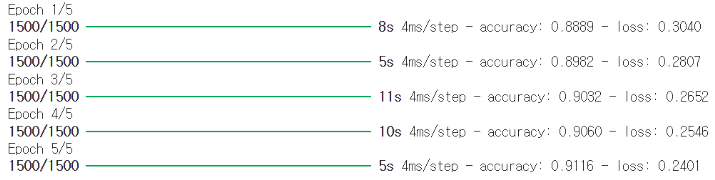

In [ ]:
from numpy import test
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()


# (train_input, train_target), (test_input, test_target) =\
#      keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print("훈련데이터")
print(train_scaled.shape, train_target.shape)
print("테스트 데이터")
print(test_input.shape, test_target.shape)
print("검증데이터")
print(val_scaled.shape, val_target.shape)

훈련데이터
(48000, 28, 28) (48000,)
테스트 데이터
(10000, 28, 28) (10000,)
검증데이터
(12000, 28, 28) (12000,)


In [ ]:
# 모델을 만드는 함수를 정의함(하나의 매개변수를 받아 리턴) .model_fn(densc추가하면 생성)

def model_fn(a_layer=None):

  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28))) # 반복적으로 사용되는 입력층
  model.add(keras.layers.Dense(100, activation='relu')) # 반복적으로 사용되는 2진 분류층

  # model_fn 함수에 (a_layer매개변수)케라스 층을 추가하면 은닉층 뒤에 하나의 층을 추가할 수 있음

  if a_layer:
    model.add(a_layer)                                    # 매개값으로 넘어오는 추가되는 층
  model.add(keras.layers.Dense(10, activation='softmax')) # 반복적으로 사용되는 다중 분류 층
  return model

In [ ]:
model = model_fn() # 위에서 만든 메서드 호출하여 모델에 넣음
# model_fn 매개값이 없으면 그냥 생성, 매개값이 있으면 모델 추가용

model.summary() # 모델의 요약 정보 확인

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
                      # 다중 분류                               정확도
history = model.fit(train_scaled, train_target, epochs=5, verbose=2)
#                                                         훈련과정 출력을 조절 함
#                           verbose=0 훈련과정을 나타내지 않음
#                           verbose=1 기본값, 에포크마다 진행 막대와 함께 손실등의 지표가 출력
#                           verbose=2 진행막대 빼고 출력

Epoch 1/5
1500/1500 - 5s - 3ms/step - accuracy: 0.8118 - loss: 0.5311
Epoch 2/5
1500/1500 - 4s - 3ms/step - accuracy: 0.8575 - loss: 0.3915
Epoch 3/5
1500/1500 - 5s - 3ms/step - accuracy: 0.8726 - loss: 0.3516
Epoch 4/5
1500/1500 - 5s - 3ms/step - accuracy: 0.8812 - loss: 0.3294
Epoch 5/5
1500/1500 - 9s - 6ms/step - accuracy: 0.8887 - loss: 0.3128


In [ ]:
print(history) # 위 훈련 결과를 history 객채가 가지고 있는데 이것을 history변수에 넣ㅇ므

In [ ]:
print(history.history.keys())
# 훈련 측정 값이 담겨 있는 history 딕셔너리가 존재함
# 정확도accuracy, 손실loss 값이 있다.

# 정확도는 complie() 메서드의 metrics 매개변수에 accuracy를 추가 했기 때문에
# history 속성에 포함되었음

dict_keys(['accuracy', 'loss'])


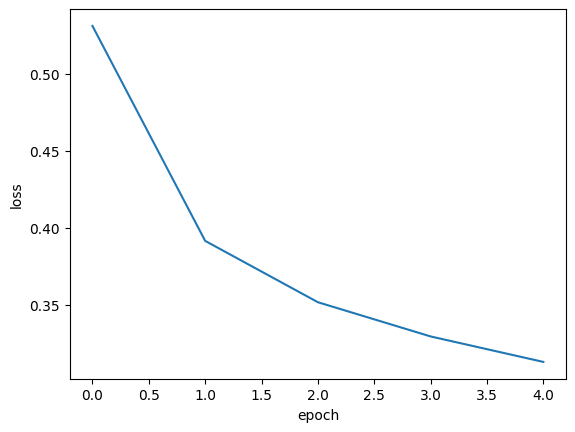

In [ ]:
import matplotlib.pyplot as plt

# history 속성에 포함된 손실과 정확돈느 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트로 matplotlib으로 쉽게 그래프로 나타낼 수 있다

plt.plot(history.history['loss'])
plt.xlabel('epoch')

# 파이썬 인덱스는 0부터 시작함 5개의 에포크는 0~4
plt.ylabel('loss')
plt.show()

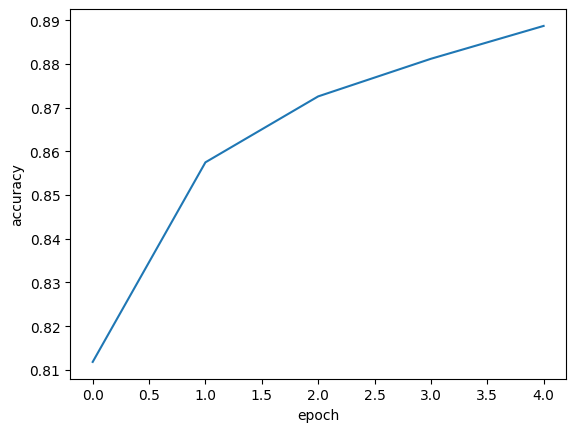

In [ ]:
# 이번에는 정확도 확인

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

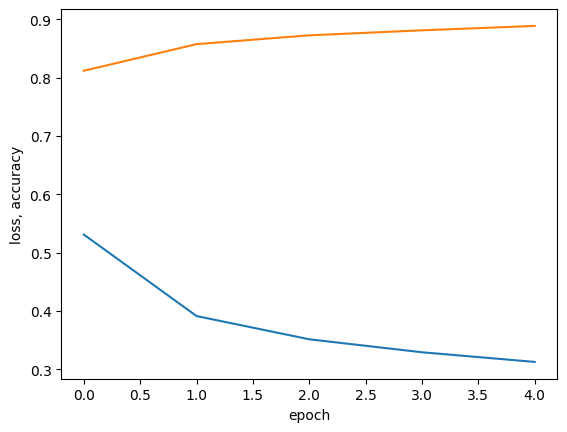

In [ ]:
plt.plot(history.history['loss'])   # 손실율
plt.plot(history.history['accuracy']) # 정확도
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.show()

In [ ]:
# 이번엔 에포크 횟수를 20번으로 확인하자

model = model_fn() # 위에서 만든 메서드로 모델 생성( 입력, 은닉, 출력)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


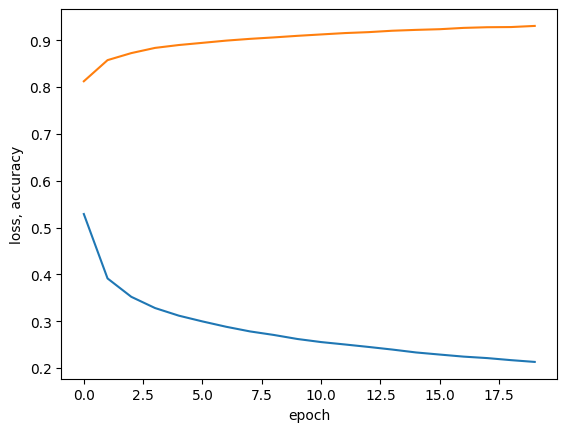

In [ ]:
plt.plot(history.history['loss'])   # 손실율
plt.plot(history.history['accuracy']) # 정확도
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.show()

In [ ]:
# 검증 손실 validation_data=(val_scaled, val_target)
# 예쩐에 확률적 경사 하강법을 사용했을 때 과대/ 과소 적합과 에포크 사이에 관계 부분이 있었다.
# 인공 신경망은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 여기도 적용된다.

# 에포크에 따른 과대/과소 적합을 파악하려면 훈련세트와 검증세트에 대한 점수가 피룡
# 위 처럼 훈련세트에 손실과 정확도만ㅁ 그리면 파악이 어렵다
# 검증 손실을 이용하여 과대/과소 적합을 응용할 예정

# keypoint https://wikidocs.net/236194
# 손실을 사용하는 것과 정확도를 사용하는 것의 차이는?
# 인공 신경망 ㅁ델이 최적화하는 대상은 정확도가 아니라 손실함수
# 손실 감소에 비례하여 정확도가 높아지지 않는 경우 발생
# 모델이 잘 훈련되었는지 확인하려면 정확도보다는 손실 함수의 값을 확인하는 것이 좋은 방법

In [ ]:
from sklearn.utils import validation
model = model_fn()
model.summary()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs = 20, verbose=2, validation_data=(val_scaled, val_target))
# 검증 손실을 구하기 위한 매개값 추가됨


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 - 7s - 5ms/step - accuracy: 0.8113 - loss: 0.5322 - val_accuracy: 0.8482 - val_loss: 0.4321
Epoch 2/20
1500/1500 - 7s - 4ms/step - accuracy: 0.8562 - loss: 0.3931 - val_accuracy: 0.8512 - val_loss: 0.4078
Epoch 3/20
1500/1500 - 8s - 5ms/step - accuracy: 0.8717 - loss: 0.3539 - val_accuracy: 0.8482 - val_loss: 0.4139
Epoch 4/20
1500/1500 - 4s - 3ms/step - accuracy: 0.8813 - loss: 0.3309 - val_accuracy: 0.8573 - val_loss: 0.3942
Epoch 5/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8879 - loss: 0.3152 - val_accuracy: 0.8528 - val_loss: 0.4144
Epoch 6/20
1500/1500 - 4s - 3ms/step - accuracy: 0.8929 - loss: 0.3014 - val_accuracy: 0.8622 - val_loss: 0.3985
Epoch 7/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8973 - loss: 0.2923 - val_accuracy: 0.8646 - val_loss: 0.4057
Epoch 8/20
1500/1500 - 5s - 3ms/step - accuracy: 0.9018 - loss: 0.2817 - val_accuracy: 0.8627 - val_loss: 0.4283
Epoch 9/20
1500/1500 - 4s - 3ms/step - accuracy: 0.9059 - loss: 0.2746 - val_accuracy: 0.8668 - 

In [ ]:
print(history.history.keys())
# 정확도accuracy, 손실loss 값이 있다.
# 추가로 검증세트 정확도 val_accuracy, 검증세트 손실 val_loss가 나옴

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


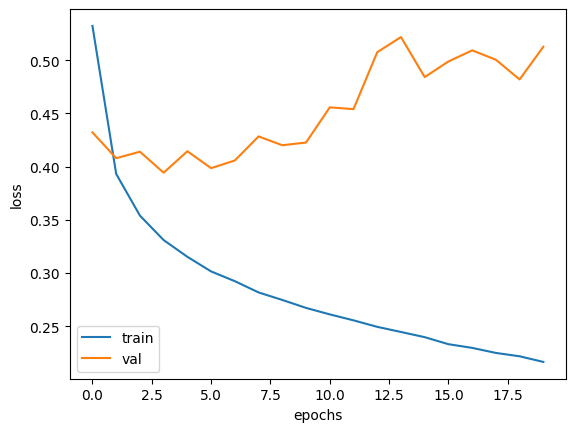

In [ ]:
# 과대/과소 적합 문제를 조사하기 위해서 훈련손실, 검증손실을 한 그래프에서 확인하자

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# 결과 : 초기엔 검증손실이 감소하다가 다섯번째 에포크만에 다시 상승
# 훈련손실은 꾸준히 감소하기에 과대적합모델이 생성
# 검증손실이 상승하는 시정을 가능한 늦추면 세트에 대한 손실이 줄어들며 검증세트에 대한 정확도가 올라갈 것 같음

# 과대적합을 막기 위한 방법으로 신경망에 특화된 규제방법(드롭아웃)을 옵티마이져 하이퍼 파라미터 조절 후 해보자

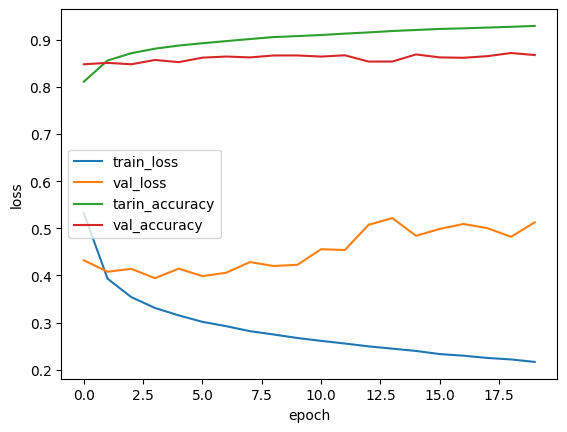

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss','tarin_accuracy', 'val_accuracy'])
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


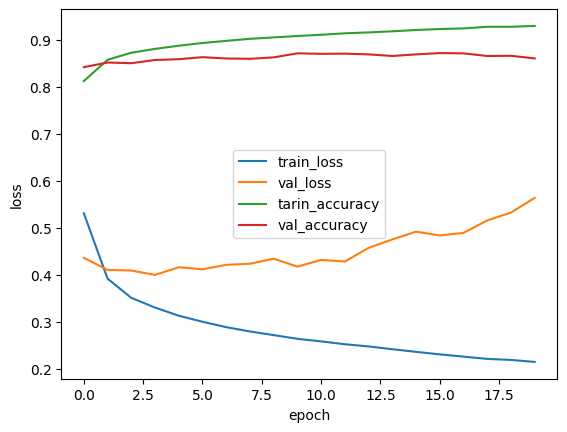

In [ ]:
# 지금은 옵티마이져(최적화) 하이퍼파라미터를 자동 조절하여 과대 적합을 완화시켜본다.
# RMSprop 옵티마이져는 많은 문제에서 동작. -> 다른 방법으로는 Adagrad, Adam 등

model = model_fn()
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose = 0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss','tarin_accuracy', 'val_accuracy'])
plt.show()

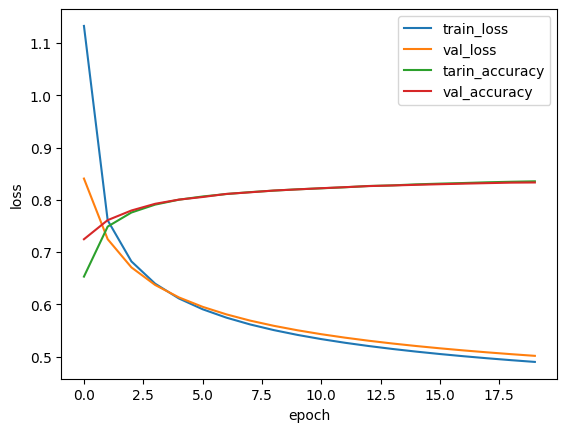

In [ ]:
model = model_fn()
adagrad = keras.optimizers.Adagrad()    # Adagrad기법으로 최적화 후 차트로 보자
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss','tarin_accuracy', 'val_accuracy'])
plt.show()

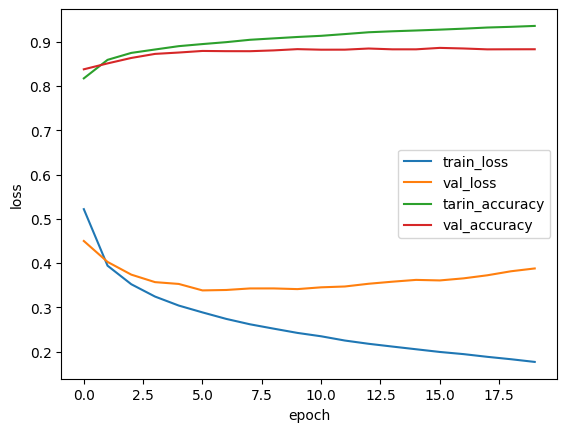

In [ ]:
model = model_fn()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))   # 2분 25초 걸림

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss','tarin_accuracy', 'val_accuracy'])
plt.show()
# 3가지의 최적화 기법을 사용해보니 adam이 안정적으로 보인다.
# 대신 과대적합을 막기위한 기법이 필요해 보인다.

In [ ]:
# 드롭아웃(Dropout)은 딥러닝의 기초가 되는 제프리 힌턴이 소개
# 훈련과정에서 층에 있는 일부 뉴런은 랜덤하게 꺼내 과대적합을 막는다

# 샘플을 처리할 때 은닉층의 두번째 뉴런이 드롭아웃되어 h2 출력이 없음
# 다른 샘플을 처리할 때는 은닉층의 첫번째 뉴런이 드롭아웃되어 h1 출력이 없음
# 뉴런은 랜덤하게 드롭아웃이 되고 얼마나 많은 뉴런을 드롭할지 우리가 하이퍼 파라이터값에 지정가능

# 드롭아웃이 왜 과대적합을 막을 수 있는지 생각해보면 이전 층의 일부 뉴련이 랜덤하게 꺼내지면
# 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있으며 모든 입력에 대해 주의를 기울여야함
# 일부 뉴련의 출력이 없을 수 있다는 것을 감안하면 이 신경명은 더 안정적인 예측을 만들 수 있다.

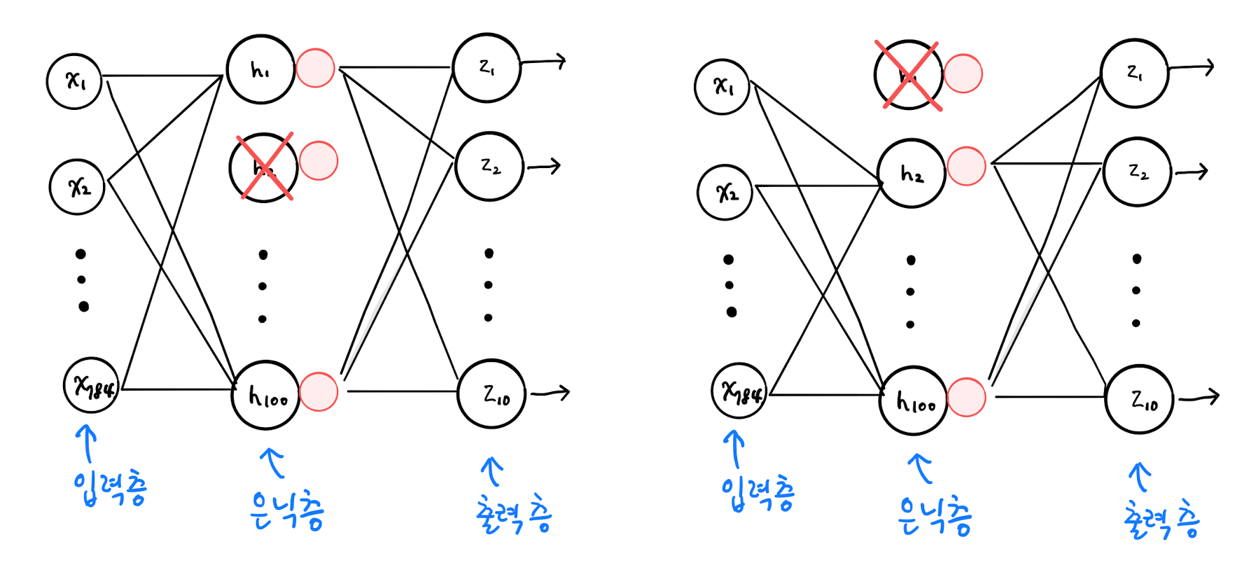

In [ ]:
# 또 다른 분석
# 앞의 드롭아웃이 적용된 2개의 신경망 그림을 보면 드롭 아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블 하는 것 처럼 상상하게 됨
# 앙상블 : 다 좋은 예측을 만들기 위해 여러개의 모델을 훈련하는 머신러닝 알고리즘
# 과대적합을 막아주는 기법

# 케라스에서 드롭아웃을 제공함
# 어떤 층 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만듦
# 드롭아웃이 층처럼 사용되지만 훈련되는 파라미터는 없음

# model_fn 함수에 드롭아웃 객체를 전달하여 층을 추가

model = model_fn(keras.layers.Dropout(0,3)) # 30% 드롭아웃

model.summary() # 확인
# 은닉층 뒤에 추가된 드롭아웃층은 훈련된느 모델 파라미터 없음
# 입력과 출력의 크기가 같음
# 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않음.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

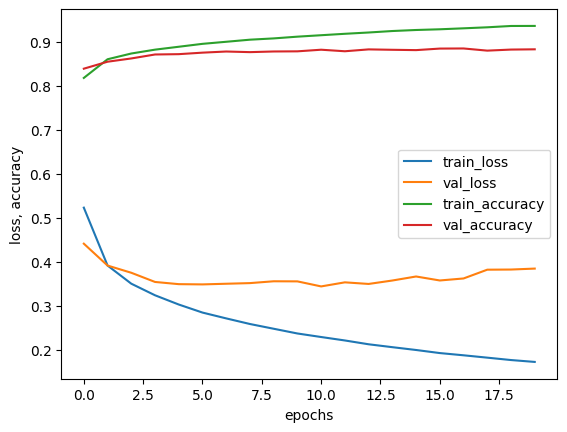

In [ ]:
# 주의사항 : 훈련이 끝난 뒤 평가나 예측을 수행할 때 드롭아웃을 적용하면 안됨
# 훈련된 모든 뉴런을 사용해야 올바른 예측 가능
# 텐서플로와 케라스는 모델을 평가와 예측에 사용할 때 자동으로 드롭아웃을 적용하지않음

# 훈련손실과 검증손실의 그래프 확인

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('loss, accuracy')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()
# 과대 적합이 줄어듦 10번째 에포크가 검증손실의 감소가 멈추지만 크게 상승하지 않음
# 20번의 에포크를 실행해서 결국 과대적합 판정 / 에포크의 수를 줄여 확인(조기종료)

In [ ]:
# 차후에 재활용하기 위해서 모델 저장과 복원도 해본다

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=10,verbose=0, validation_data=(val_scaled, val_target))

model.save('model-whole-ep10.keras') # 모델 저장

# 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights()메서드가 있음
# 텐서플로의 체크포인트 포멧으로 저장하지만(https://www.tensorflow.org/guide/checkpoint?hl=ko) .h5일경우 HDF5 포멧으로 저장함(https://geunuk.tistory.com/466)

model.save_weights('model-ep10.weights.h5')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 이제는 저장한 모델을 불려와 테스트를 진행 해보자
!ls -al model*

-rw-r--r-- 1 root root 976600 Nov 13 03:49 model-ep10.weights.h5
-rw-r--r-- 1 root root 979412 Nov 13 03:49 model-whole-ep10.keras


In [ ]:
# 훈련하지 않은 새로운 모델을 생성하여 model-ep10.weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용
# model_fn() 모델
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model-ep10.weights.h5')# 이전에 저장했던 모델 파라미터 불러오기
# 이때 사용하는 메서드는 save_weights()와 쌍을 이루는 load_weight()임
# 주의 사항 : load_weights() 메서드를 사용하려면 save_weoght()메서드로 저장했던 모델과 같은 구조여야함

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 검증 정확도 확인

import numpy as np

# perdict()메서드는 사이킷 런과 다른 샘플마다 10개의 클래스에 대한 확률을 반환

# 패션MNIST 데이터 셋에서 덜어낸 검증 세트의 샘플수는 12,000개
# predict() 메서드는 (12000, 10)크기의 배열을 반환
# 10개의 확률 중 가장 큰 값의 인덱스를 골라(.argmax) 타겟 레이블과 비교하여 정확도 계산

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
# axis=-1 배열의 마지막 차원을 따라 최대값을 고름
# 검증세트는 2차원 배열이기 때문에 마지막 차원은 1이 됨
# 예를 들어 아래 그림처럼 5x3배열에 axis=1로 한값과 axis=0으로 한 값의 인덱스를 반환함

# argmax()로 고른 인덱스(val_labels)와 타킷(val_target)을 비교하여 같으면 1이되고 다르면 0이됨
# 이를 평균으로 출력해 봄(정확도)
print(np.mean(val_labels == val_target)) # 87.97% 평균

# axis=1 이면 열을 따라 각 행의 최대값의 인덱스를 선택하고
# axis=0 이면 행을 따라 각 열의 최대값의 인덱스를 선택함.
# 그 다음 라인은 argmax()로 고른 인덱스(val_labels)와 타킷(val_target)을 비교
#   -> 두 배열에서 각 위치의 값이 같이면 1, 다르면 0 (평균하면 정확도가 됨)


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
0.87975


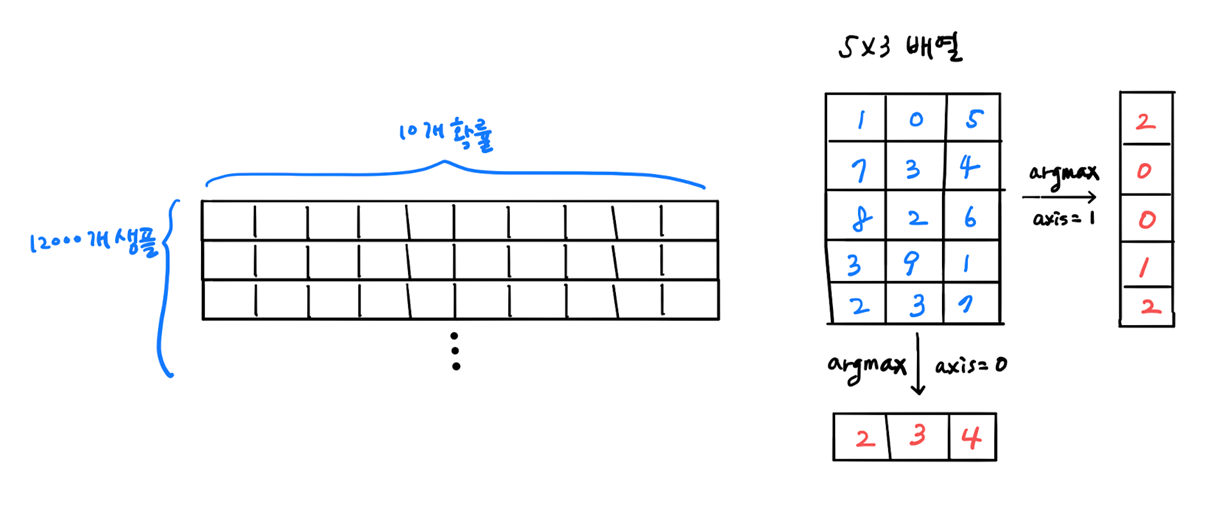

In [ ]:
# 모델 전체를 파일에서 읽은 다음 검증세트의 정확도를 출력

model = keras.models.load_model('model-whole-ep10.keras') # load_model() 저장된 파일 읽기

model.evaluate(val_scaled, val_target) # 같은 모델을 읽었기에 위와 정확도가 같음

# 20번의 에포크 동안 모델 훈련하여 검증점수가 상승하는 지점 확인
# 모델을 과대 적합 되지 않은 에포크만큼 다시 훈련
# 모델을 두번씩 훈련하지 않고 한번에 끝내는 방법 확인  -> 케라스 콜백

# https://ltlkodae.tistory.com/13 케라스 모델을 저장하는 방법 2가지 분석

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8818 - loss: 0.3342


[0.3354141116142273, 0.8797500133514404]

In [ ]:
# 새로운 모델을 만들고 바로 사용하자
# 콜백 활용
# 콜백 :  훈련과정 중간에 어떤 작업을 수행할 수 있게 하는 객체, 케라스.콜팩 패키지 있음
# fit() 메서드의 callback 매개변수에 리시트로 전달 가능
# 지금 우리가 사용할 콜백은 modelCheckpoint 콜백으로 에포크마다 저장함
# save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=1,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])
# 모델 훈련후 best-model.keras에 최고의 검증 점수를 낸 모델을 저장

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7247 - loss: 0.7953 - val_accuracy: 0.8435 - val_loss: 0.4327
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8372 - loss: 0.4597 - val_accuracy: 0.8627 - val_loss: 0.3819
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8474 - loss: 0.4169 - val_accuracy: 0.8647 - val_loss: 0.3691
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8559 - loss: 0.3936 - val_accuracy: 0.8670 - val_loss: 0.3616
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8627 - loss: 0.3764 - val_accuracy: 0.8700 - val_loss: 0.3581
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8646 - loss: 0.3660 - val_accuracy: 0.8762 - val_loss: 0.3448
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8725 - loss: 0.3490 - val_accuracy: 0.8756 - val_loss: 0.3375
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8751 - loss: 0.3451 - 

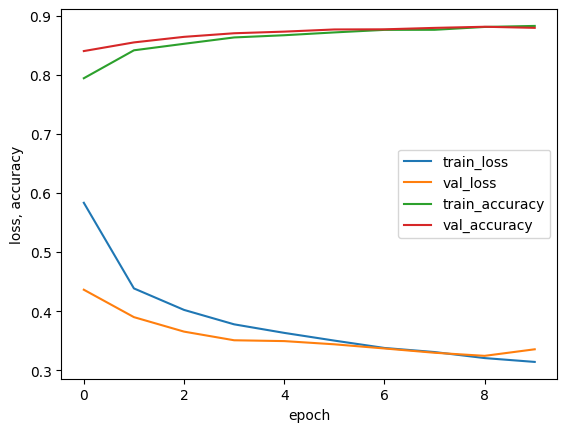

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8858 - loss: 0.3263


[0.32999423146247864, 0.8843333125114441]

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['train_loss', 'val_loss','train_accuracy', 'val_accuracy'])
plt.show()
model.evaluate(val_scaled, val_target) # 검증세트의 성능 확인 (33.10%, 87.99%) 에포크 9번
# 결론 20번을 다 돌리고 좋은 점수가 나온 9번째 에포크를 저장함.

In [ ]:
# keras.callbacks.ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장
# 여전히 20번의 에포크 동안 훈련을 함
# 사실 검증 점수가 상승하기 시작하면 그 이후에는 과대 적합이
# 더 커지기 때문에 훈련을 계속할 필요가 없음.
# 이때 훈련을 종료하면 자원과 시간일 아낄 수 있음 -> 조기종료(early stopping)

# 조기 종료는 딥러닝 분야에 많이 사용하는 기법
# 에포크의 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기도 함 - 규제방법중 하나

In [ ]:
# 케라스에는 조기종료를 위한 EarlyStopping 콜백을 제공함
# 이 콜백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 회수로 지정
# patience=2 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지 (patience:인내심)
# restore_best_weights=True -> 가장 낮은 검증 솔실을 낸 모델 파리미터로 돌림

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
# 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있음.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True) # 얼리

# 훈련을 중지하고 현재 모델의 파라미터를 최상의 파라미터로 되돌림
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7339 - loss: 0.7735 - val_accuracy: 0.8435 - val_loss: 0.4344
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8369 - loss: 0.4507 - val_accuracy: 0.8558 - val_loss: 0.3975
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8514 - loss: 0.4091 - val_accuracy: 0.8655 - val_loss: 0.3654
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8605 - loss: 0.3827 - val_accuracy: 0.8707 - val_loss: 0.3565
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8630 - loss: 0.3676 - val_accuracy: 0.8699 - val_loss: 0.3538
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8695 - loss: 0.3550 - val_accuracy: 0.8759 - val_loss: 0.3344
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8729 - loss: 0.3430 - val_accuracy: 0.8795 - val_loss: 0.3328
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8759 - loss: 0.3358 -

In [ ]:
print(early_stopping_cb.stopped_epoch)  # 조기종료 시점 에포크

10


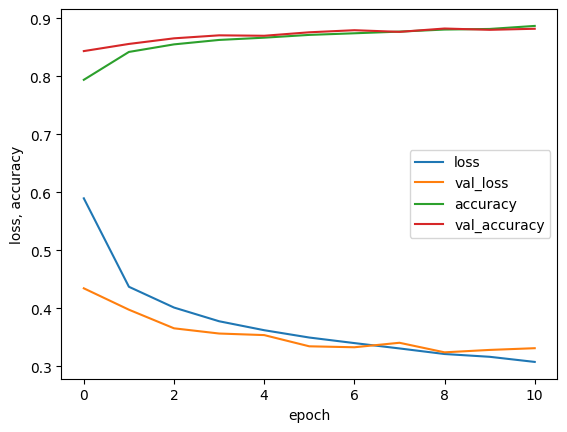

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8839 - loss: 0.3226


[0.32404300570487976, 0.8824166655540466]

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['loss', 'val_loss','accuracy', 'val_accuracy'])
plt.show()
model.evaluate(val_scaled, val_target) # 검증세트의 성능 확인 (32.4%, 88.24%) 에포크 10번
# 컴퓨터의 자원과 시간을 아끼고 콜백과 함꼐 사용하면 최상의 모델을 자동으로 저장해 준다는 것을 명심